# Import nessery modules

In [1]:
import pandas as pd ## pip install pandas
import numpy as np  ##pip install numpy
from sklearn.datasets import load_iris ## pip install scikit-learn
import matplotlib.pyplot as plt ## pip install matplotlib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor ## pip install xgboost
from sklearn import metrics
from sklearn.metrics import r2_score
import seaborn as sns ## pip install seaborn

# Load data set

In [2]:
raw_data=pd.read_csv('car.csv')
raw_data.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


# Exploratory data analysis

In [3]:
list(raw_data.columns)

['Car_Name',
 'Year',
 'Selling_Price',
 'Present_Price',
 'Driven_kms',
 'Fuel_Type',
 'Selling_type',
 'Transmission',
 'Owner']

In [4]:
raw_data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
str_cols=[]
for i in list(raw_data.columns):
    if i not in list(raw_data.describe().columns):
        str_cols.append(i)
print("String columns:")
print(str_cols)
print("Integer columns:")
list(raw_data.describe().columns)

String columns:
['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission']
Integer columns:


['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']

# Exploratory Data Analysis

<Axes: xlabel='Selling_type', ylabel='Selling_Price'>

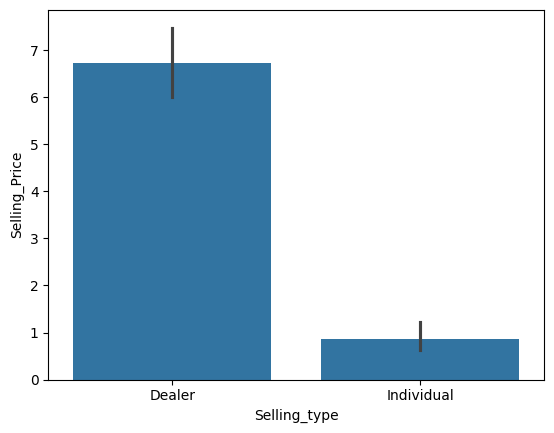

In [6]:
sns.barplot(x=raw_data['Selling_type'],y=raw_data['Selling_Price'])

<Axes: xlabel='Fuel_Type', ylabel='Selling_Price'>

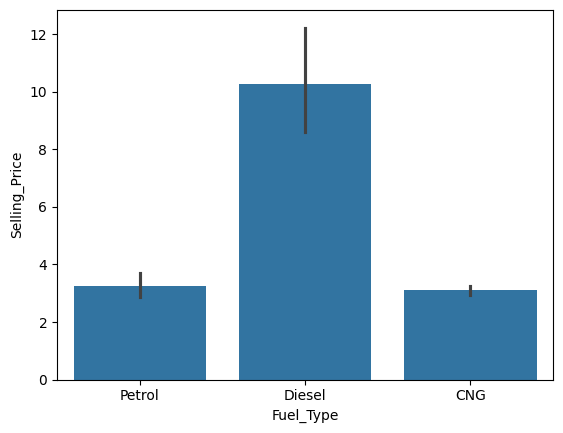

In [7]:
sns.barplot(x=raw_data['Fuel_Type'],y=raw_data['Selling_Price'])

<Axes: xlabel='Owner', ylabel='Selling_Price'>

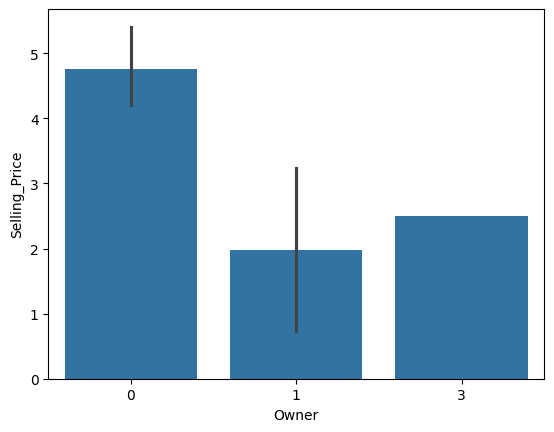

In [8]:
sns.barplot(x=raw_data['Owner'],y=raw_data['Selling_Price'])

<Axes: xlabel='Transmission', ylabel='Selling_Price'>

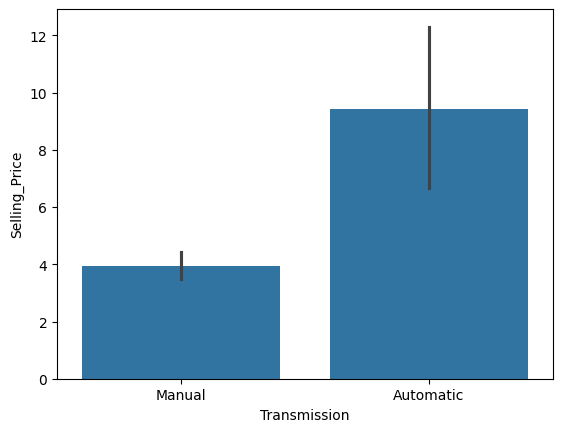

In [9]:
sns.barplot(x=raw_data['Transmission'],y=raw_data['Selling_Price'])

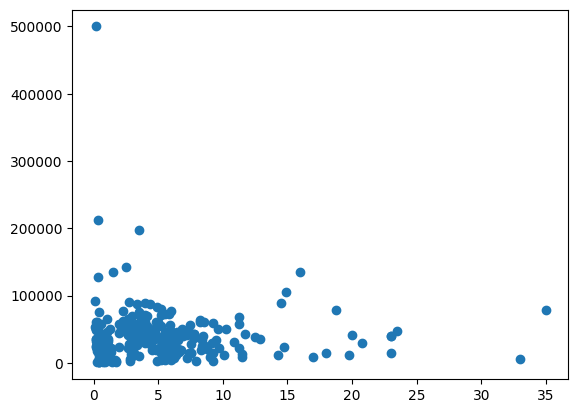

In [10]:
plt.scatter(raw_data['Selling_Price'],raw_data['Driven_kms'])

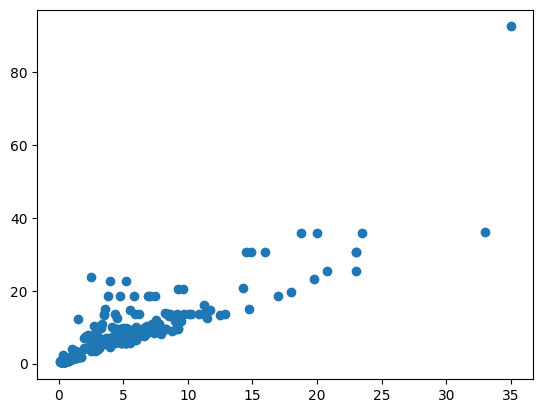

In [11]:
plt.scatter(raw_data['Selling_Price'],raw_data['Present_Price'])

# Data Preprocessing
#### As there are columns with string values we need to convert them by assigning numaric values

In [12]:
raw_data['Car_Name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [13]:
data=raw_data.drop('Car_Name',axis=1)
data

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [14]:
values=list(data['Fuel_Type'].unique())
data['Fuel_Type']=data['Fuel_Type'].replace(values,[0,1,2])

In [15]:
values=list(data['Selling_type'].unique())

In [16]:
data['Selling_type']=data['Selling_type'].replace(values,[0,1])

In [17]:
values=list(data['Transmission'].unique())

In [18]:
data['Transmission']=data['Transmission'].replace(values,[0,1])

In [19]:
data

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,0,0,0,0
1,2013,4.75,9.54,43000,1,0,0,0
2,2017,7.25,9.85,6900,0,0,0,0
3,2011,2.85,4.15,5200,0,0,0,0
4,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,1,0,0,0
297,2015,4.00,5.90,60000,0,0,0,0
298,2009,3.35,11.00,87934,0,0,0,0
299,2017,11.50,12.50,9000,1,0,0,0


# Feature Extraction 

In [20]:
X=np.array(data.drop('Selling_Price',axis=1))
Y=np.array(data['Selling_Price'])

In [21]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=123)

In [22]:
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(270, 7) (270,)
(31, 7) (31,)


# Model selection

### Linear Regression model 

In [23]:
LR_model=LinearRegression()
LR_model.fit(X_train,Y_train)

LinearRegression()

In [24]:
Y_predicted_LR=LR_model.predict(X_test)
accurecy=r2_score(Y_test,Y_predicted_LR)
print(accurecy*100)

83.22932677592705


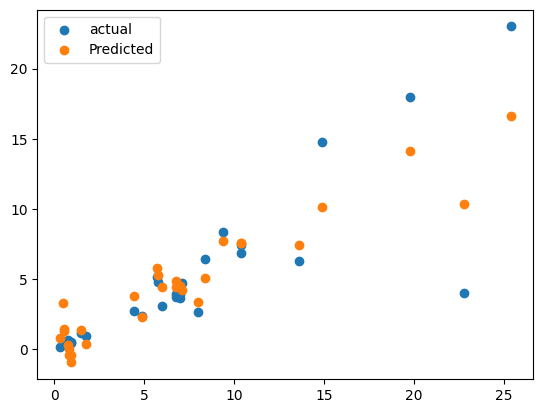

In [25]:
plt.scatter(X_test[:,1],Y_test)
plt.scatter(X_test[:,1],Y_predicted_LR)
plt.legend(['actual','Predicted'])

### XGboost Model 

In [26]:
XGB_model=XGBRegressor()
XGB_model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [27]:
Y_predicted_XGB=XGB_model.predict(X_test)
accurecy=r2_score(Y_test,Y_predicted_XGB)
print(accurecy*100)

97.34169574157367


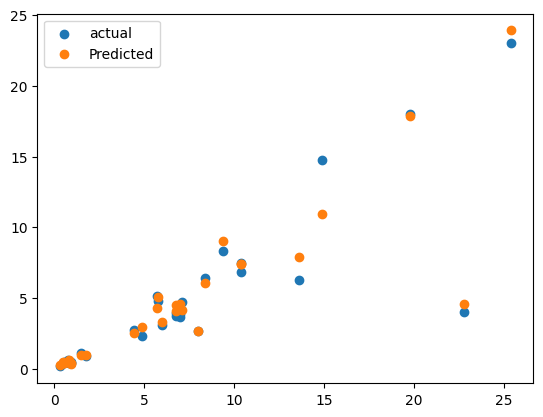

In [28]:
plt.scatter(X_test[:,1],Y_test)
plt.scatter(X_test[:,1],Y_predicted_XGB)
plt.legend(['actual','Predicted'])

### Decision Tree Model

In [29]:
DTR_model = DecisionTreeRegressor()
DTR_model.fit(X_train,Y_train)

DecisionTreeRegressor()

In [30]:
Y_predicted_DTR=DTR_model.predict(X_test)
accurecy=r2_score(Y_test,Y_predicted_DTR)
print(accurecy*100)

96.99360846331876


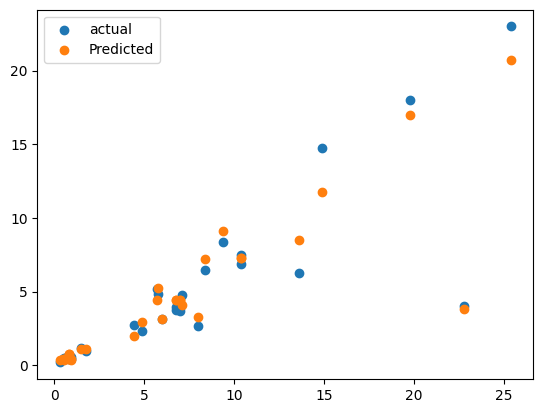

In [31]:
plt.scatter(X_test[:,1],Y_test)
plt.scatter(X_test[:,1],Y_predicted_DTR)
plt.legend(['actual','Predicted'])

### Random Forest Model

In [32]:
RFR_model=RandomForestRegressor()
RFR_model.fit(X_train,Y_train)

RandomForestRegressor()

In [33]:
Y_predicted_RFR=RFR_model.predict(X_test)
accurecy=r2_score(Y_test,Y_predicted_RFR)
print(accurecy*100)

96.40360795575836


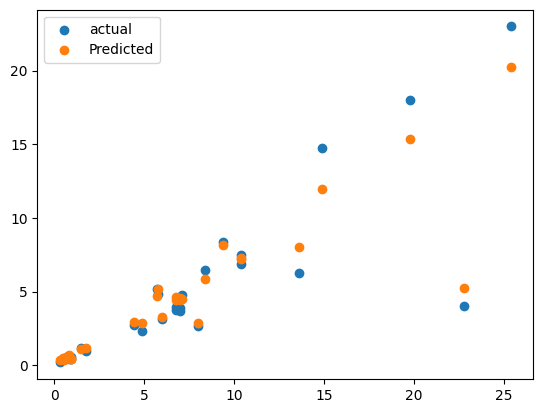

In [34]:
plt.scatter(X_test[:,1],Y_test)
plt.scatter(X_test[:,1],Y_predicted_RFR)
plt.legend(['actual','Predicted'])